In [2]:
source("K2methods.r")
library(purrr)
library(Rgraphviz)
library(bnlearn)
library(bnstruct)

In [3]:
data = child()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...



bnstruct :: imputation finished.



In [5]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
cat('The dataset dimensions are:', dim(DF))

set.seed(9112001)
# IF YOU RUN AGAIN THE PERMUTATION CHANGES
DF = DF[, sample(ncol(DF))]
head(DF)

The dataset dimensions are: 5000 20

,V13,V10,V1,V3,V17,V19,V9,V15,V20,V7,V5,V18,V11,V4,V8,V16,V2,V12,V14,V6
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,2,3,3,1,2,2,2,1,1,2,1,2,1,2,3,1,2,3
2,2,1,2,2,2,2,2,1,2,1,1,1,2,1,2,2,4,1,2,2
3,2,1,2,1,2,2,2,2,2,1,1,1,2,2,2,1,3,2,2,3
4,1,1,2,1,1,1,2,1,2,1,1,1,3,1,1,3,4,1,2,3
5,1,1,2,1,1,2,1,2,2,1,2,1,3,2,1,1,2,1,2,4
6,3,1,2,1,1,3,2,2,2,1,1,1,3,2,3,2,2,1,2,4


In [6]:
struct = K2_algorithm(n = ncol(DF), u = 5, D = DF)

In [7]:
struct

[[1]]
[1] NA

[[2]]
[1] 1

[[3]]
[1] 1 2

[[4]]
[1] 1 3

[[5]]
[1] 1 4

[[6]]
[1] 1 5

[[7]]
[1] 1 6

[[8]]
[1] 6 1

[[9]]
[1] 6 1

[[10]]
[1] 6 5 7

[[11]]
[1] 6 5 7

[[12]]
[1] 6 1

[[13]]
[1]  6 11

[[14]]
[1] 6 1

[[15]]
[1] 6 5 7

[[16]]
[1] 6 1

[[17]]
[1] 6 9

[[18]]
[1] 17  9

[[19]]
[1] 17  6

[[20]]
[1]  6 16

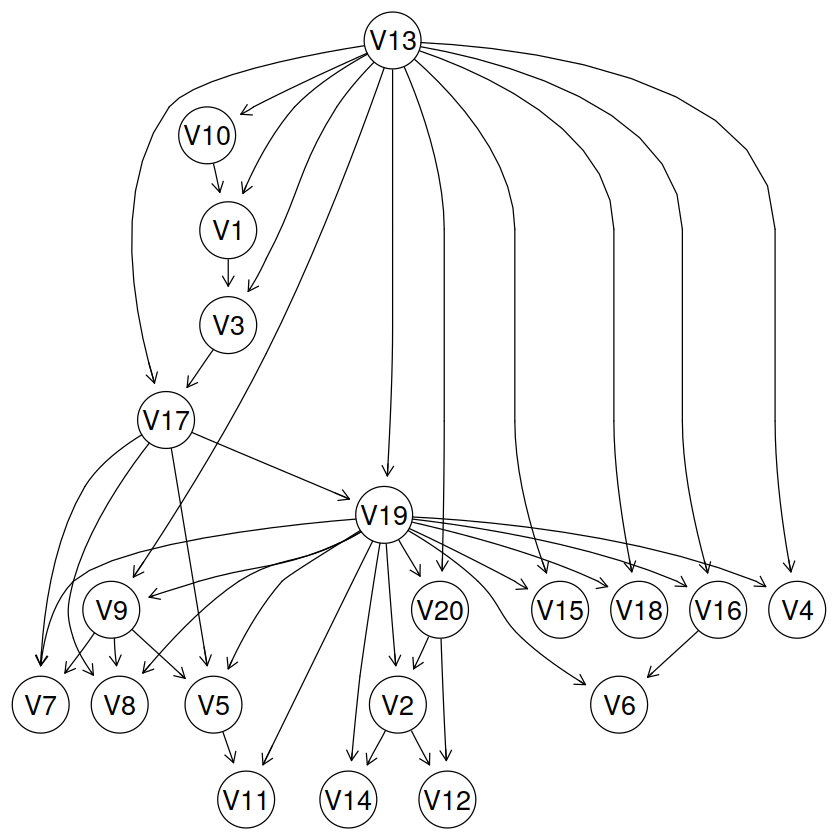

In [8]:
dag = get_dag(names(DF), struct)
graphviz.plot(dag)